In [2]:
import os

In [3]:
import numpy as np

In [4]:
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\yuggu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yuggu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yuggu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yuggu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [5]:
import cv2

In [6]:
import tensorflow as tf

In [7]:
import cv2,os
data_path = 'C:\dataset'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [8]:
img_size = 100
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path,category)
    img_names = os.listdir(folder_path)
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        #print(img_path)
        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
            #print(target)
        except:
            pass

In [9]:
import numpy as np
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

In [10]:
np.save('data',data)
np.save('target',new_target)

In [11]:
print(data)

[[[[0.35686275]
   [0.34117647]
   [0.38039216]
   ...
   [0.34509804]
   [0.34117647]
   [0.3254902 ]]

  [[0.35294118]
   [0.3372549 ]
   [0.36470588]
   ...
   [0.33333333]
   [0.32156863]
   [0.33333333]]

  [[0.3372549 ]
   [0.34901961]
   [0.35686275]
   ...
   [0.52941176]
   [0.46666667]
   [0.37254902]]

  ...

  [[0.45882353]
   [0.4745098 ]
   [0.47843137]
   ...
   [0.65490196]
   [0.65098039]
   [0.61960784]]

  [[0.45882353]
   [0.47843137]
   [0.47843137]
   ...
   [0.60784314]
   [0.60784314]
   [0.56078431]]

  [[0.43137255]
   [0.44313725]
   [0.45490196]
   ...
   [0.61176471]
   [0.58431373]
   [0.59215686]]]


 [[[0.00784314]
   [0.00784314]
   [0.01176471]
   ...
   [0.01568627]
   [0.01568627]
   [0.01568627]]

  [[0.00784314]
   [0.00784314]
   [0.01176471]
   ...
   [0.01960784]
   [0.01960784]
   [0.01568627]]

  [[0.00784314]
   [0.00784314]
   [0.01568627]
   ...
   [0.01568627]
   [0.01568627]
   [0.01568627]]

  ...

  [[0.19607843]
   [0.19215686]
   [0.1

In [12]:
print(new_target)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [13]:
import numpy as np
data = np.load('data.npy')
target = np.load('target.npy')

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
model = Sequential()
#1st conv layer of 3*3*200
model.add(Conv2D(200,(3,3),input_shape = data.shape[1:]))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size = (2,2)))
#2nd conv layer of 3*3*100
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [16]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size = 0.1)

In [17]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor = 'val_loss',verbose = 0,save_best_only = True,mode = 'auto')
history = model.fit(train_data,train_target,epochs = 10,callbacks = [checkpoint],validation_split = 0.2)


Train on 4236 samples, validate on 1059 samples
Epoch 1/10
4236/4236 [==============================] - 283s 67ms/step - loss: 0.4128 - accuracy: 0.7934 - val_loss: 0.1256 - val_accuracy: 0.9575
Epoch 2/10
4236/4236 [==============================] - 223s 53ms/step - loss: 0.1227 - accuracy: 0.9540 - val_loss: 0.1156 - val_accuracy: 0.9622
Epoch 3/10
4236/4236 [==============================] - 222s 52ms/step - loss: 0.0880 - accuracy: 0.9700 - val_loss: 0.0852 - val_accuracy: 0.9688
Epoch 4/10
4236/4236 [==============================] - 221s 52ms/step - loss: 0.0841 - accuracy: 0.9698 - val_loss: 0.0884 - val_accuracy: 0.9660
Epoch 5/10
4236/4236 [==============================] - 222s 52ms/step - loss: 0.0595 - accuracy: 0.9790 - val_loss: 0.0744 - val_accuracy: 0.9754
Epoch 6/10
4236/4236 [==============================] - 222s 52ms/step - loss: 0.0571 - accuracy: 0.9790 - val_loss: 0.0744 - val_accuracy: 0.9754
Epoch 7/10
4236/4236 [==============================] - 214s 51ms/ste

In [ ]:
from matplotlib import pyplot as plt


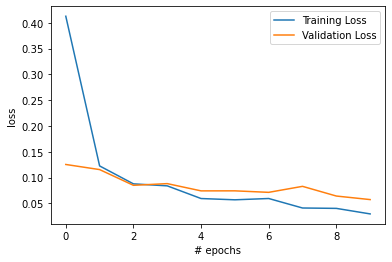

In [18]:
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

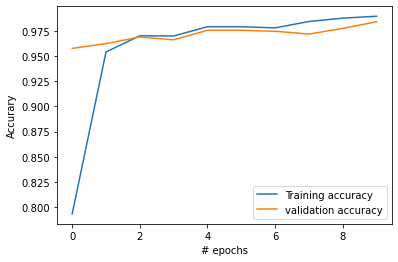

In [19]:
plt.plot(history.history['accuracy'],label = 'Training accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('Accurary')
plt.legend()
plt.show()

In [44]:
os.environ["OPENCV_VIDEOIO_PRIORITY_MSMF"] = "0"
face_clasfr = cv2.CascadeClassifier(r'C:\Users\yuggu\Downloads\haarcascade_frontalface_default.xml')
source = cv2.VideoCapture(0)
label_dict = {0:'Mask',1:'No Mask'}
color_dict = {0:(0,255,0),1:(0,0,255)}

In [40]:
from keras.models import load_model
model = load_model('model-010.model')

In [ ]:

while True:
    ret,img = cv2.VideoCapture(0).read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_clasfr.detectMultiScale(gray,1.3,5)
    for x,y,w,h in faces:
        face_img = gray[y:y+w,x:x+w]
        resized = cv2.resize(face_img,(100,100))
        normalized = resized/255.0
        reshaped = np.reshape(normalized,(1,100,100,1))
        result = model.predict(reshaped)
        
        label = np.argmax(result,axis = 1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img,label_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow('LIVE',img)
    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()
cv2.VideoCapture(0).release()